# Automating Image Annotation <img src="docs/codait-logo.png" align="right" style="width:40px"><img src="docs/ibm-logo.png" align="right" style="width:100px">

simon@ibm.com | Karthik.Muthuraman@ibm.com

**Table of contents:**
    * Data Samples
    * Image Annotation
        * Generate captions
        * Extract hashtags
        * (optional) Image style transfer
    * End-to-end Automation
        * Download images
        * Generate captions
        * Generate hashtags
        * Upload
    * (optional) More Image Annotation Tools

**What is the Model Asset Exchange?**

<img src="docs/MAX-screenshot.png" align="right" style="width:40%; margin-left: 50px;">

The [Model Asset Exchange (MAX)](https://developer.ibm.com/exchanges/models/all/) is a platform created by IBM to host free, open source deep learning models for developers of all experience levels. All models are freely available as Docker containers!

This demonstration includes:
- [MAX-Object-Detector](https://developer.ibm.com/exchanges/models/all/max-object-detector/)
- [MAX-Image-Caption-Generator](https://developer.ibm.com/exchanges/models/all/max-image-caption-generator/)
- [MAX-Sports-Video-Classifier](https://developer.ibm.com/exchanges/models/all/max-sports-video-classifier/)

To achieve the goal of this notebook, we will programmatically demonstrate some of the MAX models using the python `requests` module.

Please visit our [website](https://developer.ibm.com/exchanges/models/all/) for all MAX models. 


**Introduction to this notebook**

In this notebook, we will demonstrate how to use IBM's Model Asset Exchange to build an end-to-end pipeline for automated image annotation. 

Our inspiration for the idea can be found [here](https://medium.com/@chrisbuetti/how-i-eat-for-free-in-nyc-using-python-automation-artificial-intelligence-and-instagram-a5ed8a1e2a10). This Medium article describes the data science process of automating an Instagram account to the point where the author can eat world-class meals for free in the city of New York.

<img src="docs/inspiration.png" style="height: 200px">

**Dependencies:**
- The Model Asset Exchange
- Python3 with the following dependencies:

In [1]:
!pip install Pillow requests textblob

In [2]:
# Standard libraries
import os
import random
from io import BytesIO
from IPython.display import Video

# Additional dependencies
from PIL import Image # Pillow (image utilities)
import requests # requests (http requests)
from utils.nlp import remove_stopwords # Natural Language Toolkit

[nltk_data] Downloading package brown to /Users/splovyt/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/splovyt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/splovyt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Samples

Let's take a look at our directory of example images.

In [3]:
image_dir = 'data/images/'

Display a random image.

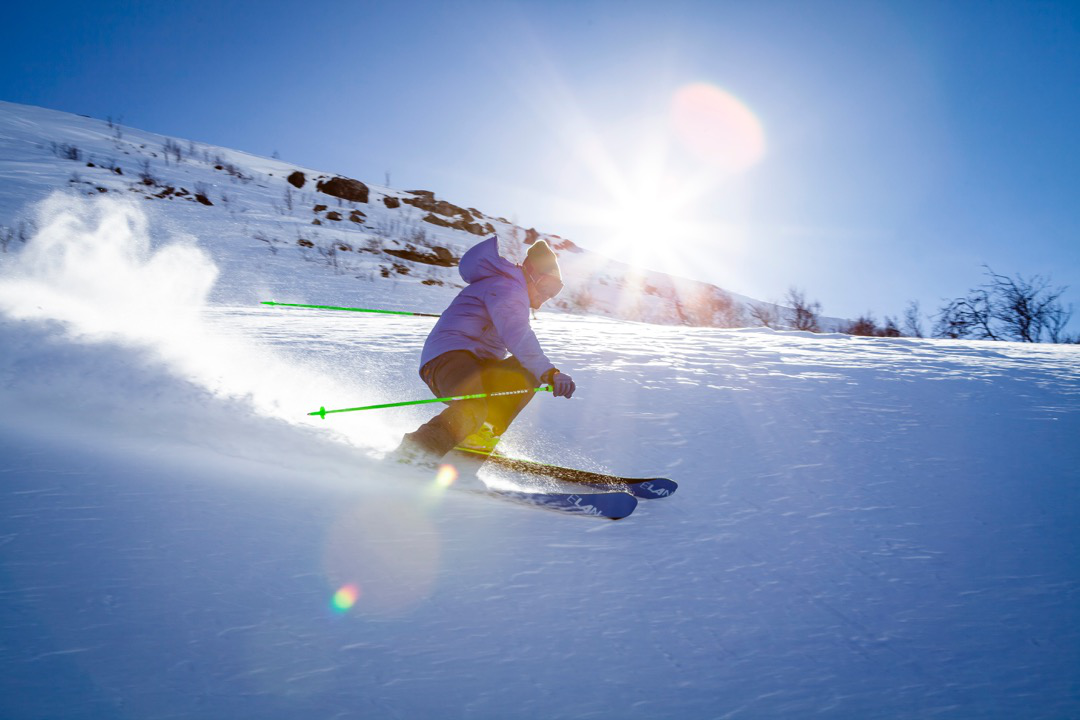

In [4]:
image_files = [image_dir + x for x in os.listdir(image_dir) if '.jpg' in x or '.png' in x]
Image.open(random.choice(image_files))

# Image Annotation

Select an image from the image files.

In [5]:
image_files

['data/images/action-beach-fun-416676.jpg',
 'data/images/action-adult-adventure-298007.jpg',
 'data/images/action-australia-beach-533509.jpg',
 'data/images/athlete-ball-baseball-160533.jpg',
 'data/images/action-balance-fun-305250.jpg',
 'data/images/athletes-audience-ball-39593.jpg',
 'data/images/action-adventure-beach-390051.jpg',
 'data/images/7-action-athlete-896567.jpg',
 'data/images/cold-daytime-goggles-848611.jpg',
 'data/images/action-american-athlete-209774.jpg',
 'data/images/action-beach-carribean-240513.jpg',
 'data/images/biker-circuit-competition-63249.jpg',
 'data/images/action-adventure-cold-298008.jpg',
 'data/images/action-adventure-bicycle-71104.jpg',
 'data/images/action-activity-athlete-163487.jpg',
 'data/images/action-beach-birds-305268.jpg',
 'data/images/cold-cool-man-47356.jpg']

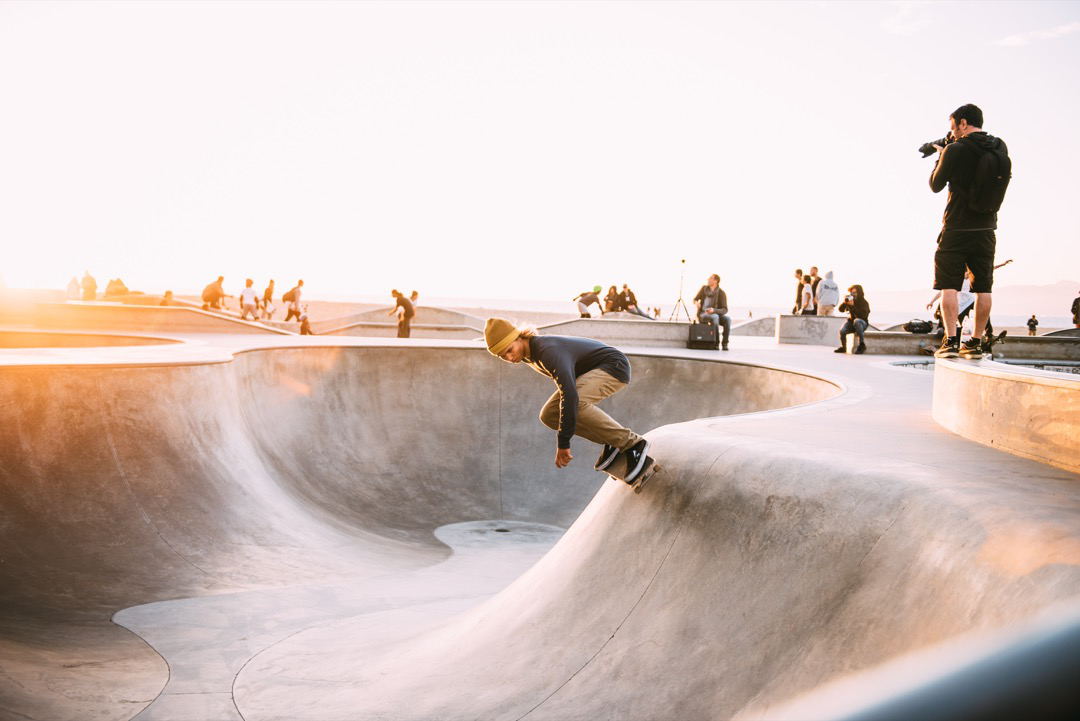

In [6]:
my_image = 'data/images/action-balance-fun-305250.jpg'
Image.open(my_image)

### 1. Generate a caption using MAX

Here, we will use a MAX model hosted on a public instance to generate a fitting caption for our input image. The appropriate model here is the [MAX Image Caption Generator](https://developer.ibm.com/exchanges/models/all/max-image-caption-generator/).

_Note: If you want to make a lot of queries to the model, or if you want to use this model offline (e.g. as part of an application), it's usually a good idea to download the model as a Docker container. If you have Docker installed, it only takes one line of code!_

[this model's instruction page](https://developer.ibm.com/exchanges/models/all/max-image-caption-generator/) | [more info on Medium](https://medium.com/codait/ready-to-use-deep-learning-models-f234be9ccfc3) | [more info on GitHub](https://github.com/CODAIT/MAX-SVL-Workshop)

**The Image Caption Generator's underlying architecture** ([source](https://github.com/tensorflow/models/tree/master/research/im2txt#architecture)):

<img src="docs/show_and_tell_architecture.png" style="height: 300px">

**Fortunately, using the network is extremely easy!**

The usual Python model querying process takes three steps:
- Specify the Model URL
- Upload the input image to the model 
- Parse the output of the model

Give it a try! Explore the public instance of the model at the url below and try to use your knowledge of Python to post an image to the model.

http://max-image-caption-generator.max.us-south.containers.appdomain.cloud/

The solution of the exercise can be found in the `exercise_solution.py` file, or by reusing another example in this notebook.

In [ ]:
# The served model: MAX-Image-Caption-Generator
model_endpoint = 'http://max-image-caption-generator.max.us-south.containers.appdomain.cloud/' + 'model/predict'

# Upload an image to the MAX model's rest API
# (please complete this)
requests.post(url=model_endpoint, ...)
    
# Show the output
# (please complete this)
# ...

Let's select the first caption as our image caption.

In [ ]:
# Extract the first caption from the output of the above cell
my_caption = ...
print(my_caption)

### 2. Generate Hashtags

Captions on social media such as Instagram, Facebook, or Twitter are usually heavily accompanied with hashtags!

**a. Use NLTK to extract nouns from the caption**

We will simply remove stopwords from the caption to generate tags. This method works great for our application!

In [9]:
tags = remove_stopwords(my_caption)
tags

['man', 'riding', 'skateboard', 'side', 'ramp']

**b. Detect objects in an image and turn into hashtags**

The MAX Object Detector is a great tool for general object detecton in images, for example for indexing images or videoframes. However, for this application, high-level objects are not specific enough to be used as hashtags.

We recommend taking a look at the [documentation](https://developer.ibm.com/exchanges/models/all/max-object-detector/) on the Object Detector, or trying out the [webapp](http://max-object-detector.max.us-south.containers.appdomain.cloud/app/).

In [10]:
# The served model: MAX-Object-Detector
model_endpoint = 'http://max-object-detector.max.us-south.containers.appdomain.cloud/' + 'model/predict'

# Upload an image to the MAX model's rest API
with open(my_image, 'rb') as file:
    file_form = {'image': (my_image, file, 'image/jpeg')}
    # Post the image to the rest API using the requests library
    r = requests.post(url=model_endpoint, files=file_form)
    # Return the JSON
    response = r.json()

In [11]:
objects = [x['label'] for x in response['predictions']]
objects

['person', 'person', 'person', 'person']

### 3. (optional) Image Style Transfer

Additionally, we can use the MAX-Image-Style-Transfer to apply one of the pre-determined styles to an image.

The four 'styles' are:
- mosaic
- candy
- rain princess
- udnie

Warning: this style-transfer process can take up to 3 minutes to complete.

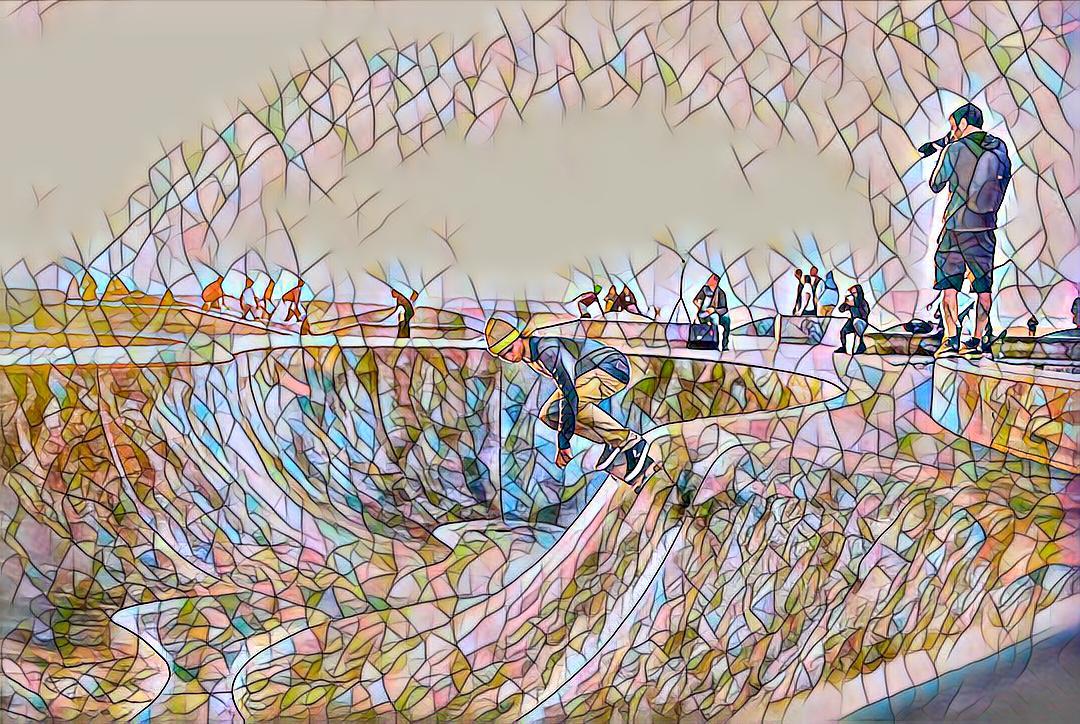

In [12]:
# Specify the model endpoint url. This is the API to which we will send the input data to.
model_endpoint = 'http://max-fast-neural-style-transfer.max.us-south.containers.appdomain.cloud/' + 'model/predict'

# Choose the style as a parameter in the API url (only pick one)
model_endpoint += '?model=mosaic'
# model_endpoint += '?model=candy'
# model_endpoint += '?model=rain_princess'
# model_endpoint += '?model=udnie'

# Uploading the image to the model
with open(my_image, 'rb') as file:
    file_form = {'image': (my_image, file, 'image/jpeg')}
    # Post the image to the rest API using the requests library
    response = requests.post(url=model_endpoint, files=file_form)
    # Load the output image into memory
    output_image = Image.open(BytesIO(response.content))

# Show the output image
output_image

# End-to-End automation

### 1. Download sports images

[Pexels.com](https://www.pexels.com/royalty-free-images/) hosts a collection of royalty-free images, which can be used for a variety of applications. We will use their [API](https://www.pexels.com/api/) to download random sports and feed them into our pipeline.

Please apply for your own API_TOKEN using the [documentation](https://www.pexels.com/api/new/).

Let's automatically download a random sports image!

In [13]:
API_TOKEN = '563492ad6f917000010000010802fc97d7a44fc28e6d75a9efd031b8s'

In [14]:
# Download a random image
# random_sports_photo = requests.get('https://api.pexels.com/v1/search?query=sports&per_page=1&page={}'.format(random.randint(1,100)), headers={'Authorization': API_TOKEN[:-1]}).json()
# download_url = random_sports_photo['photos'][0]['src']['medium']

# OR, use an example image
download_url = 'https://images.pexels.com/photos/209977/pexels-photo-209977.jpeg?auto=compress&cs=tinysrgb&h=350'

In [15]:
img = Image.open(BytesIO(requests.get(download_url).content))

### 2. Generate captions

To generate a caption as demonstrated higher in this notebook.

In [16]:
# The served model
model_endpoint = 'http://max-image-caption-generator.max.us-south.containers.appdomain.cloud/' + 'model/predict'

# Upload an image to the MAX model's rest API
file_form = {'image': ('photo.jpg', BytesIO(requests.get(download_url).content), 'image/jpeg')}
# Post the image to the rest API using the requests library
r = requests.post(url=model_endpoint, files=file_form)
# Return the JSON
response = r.json()
    
# Show the output
print('----OUTPUT CAPTIONS----\n')
for i, x in enumerate(response['predictions']):
    print(str(i+1)+'.', x['caption'])

----OUTPUT CAPTIONS----

1. a tennis racket with a ball in it
2. a tennis racket with a tennis ball in it
3. a tennis racket with a tennis ball in it .


We will automatically choose the highest ranked caption.

In [17]:
# Select the first caption
my_caption = response['predictions'][0]['caption']

### 3. Add hashtags

Now we'll extract tags from the caption, and add them to the end of the caption.

In [18]:
# Extract tags by removing stopwords from the caption
tags = remove_stopwords(my_caption)

for t in tags:
    # Add #tag at te end of the caption
    my_caption += ' #' + t

### 4. Print a summary before uploading

We will display the result to show what's happening.

a tennis racket with a ball in it #tennis #racket #ball


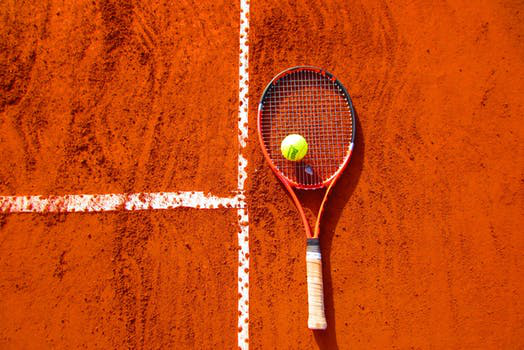

In [19]:
print(my_caption)
img

### 5. Upload to Social Media

If the result looks good, we can automatically post this to Instagram, using the Python library shown below. We will not actually execute this here.

https://github.com/LevPasha/Instagram-API-python

<img src='docs/instagram_api.png' style="height: 300px">

## Done!

We can repeat steps 1-5 as many times as we want to automatically post high-quality sports images to Instagram. If we gain enough followers, we might be able to secure a free front-row seat every once in a while ;-).

<img src="docs/im_a_robot.png" style="height: 300px">

# Want to learn more?

If you want to learn how to spin up a model like this on your local system using Docker (for example, to integrate in your own application), please find the instructions in the tutorial below.

http://ibm.biz/MAX-SVL-WORKSHOP

# (optional) More Image Annotation Tools

The [Model Asset Exchange](https://developer.ibm.com/exchanges/models/all/) is not limited to the above models.

Next to Audio, NLP, and Time Series models, there are a couple more Image and Video models:

<img src='docs/max-image-resolution-enhancer.png' style="height: 300px;" align='left'>
<img src='docs/max-image-segmenter.png' style="height: 300px;" align='right'>

<img src='docs/max-image-colorizer.png' style="height: 300px;" align='left'>
<img src='docs/max-scene-classifier.png' style="height: 300px;" align='right'>

<img src='docs/max-human-pose-estimator.png' style="height: 300px;" align="left">
<img src='docs/max-facial-age-estimator.png' style="height: 300px;" align="right">

<img src='docs/max-breast-cancer-mitosis-detector.png' style="height: 300px;" align="left">
<img src='docs/max-sports-video-classifier.png' style="height: 300px;" align="right">

... and many more to be found at [http://ibm.biz/model-exchange](http://ibm.biz/model-exchange)!